In [1]:
from sklearn.metrics import classification_report
import torch
import torch.nn.functional as F
# torch.cuda.set_device(1)
import models, train, utils
from importlib import reload
reload(models)
reload(train)
reload(utils)

<module 'utils' from '/home/cse/btech/cs1180416/col870-deep-learning/A2/utils.py'>

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
query_X = torch.load('data/pt-cache/query_X.pt', map_location='cpu')
target_X = torch.load('data/pt-cache/target_X.pt', map_location='cpu')
query_y = torch.load('data/pt-cache/query_y.pt', map_location='cpu')
target_y = torch.load('data/pt-cache/target_y.pt', map_location='cpu')

In [4]:
train_query_X, test_query_X = torch.split(query_X, [9000,1000], dim=0)
train_target_X, test_target_X = torch.split(target_X, [9000,1000], dim=0)

In [5]:
lenet = models.LeNet()
lenet.load_state_dict(torch.load('data/pt-cache/lenet.pt', map_location='cpu'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [6]:
train_x = utils.decode_sudoku_img(train_query_X, lenet, device, 4096).cpu()
train_X = F.one_hot(train_x, num_classes=9).view(-1,576)
train_y = utils.decode_sudoku_img(train_target_X, lenet, device, 4096).cpu()

In [7]:
rrn = models.RRN(24)

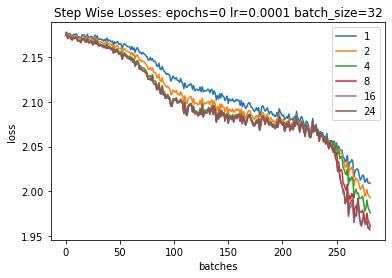

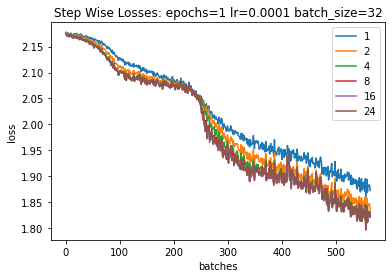

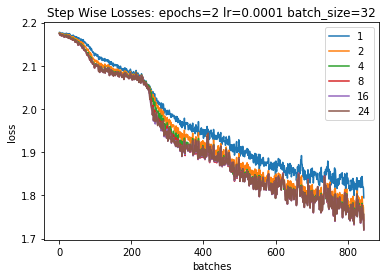

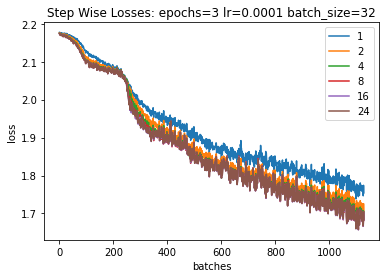

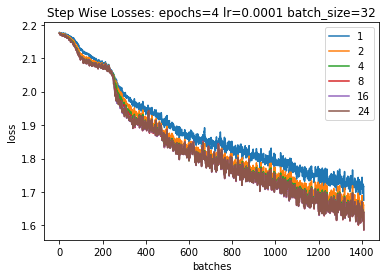

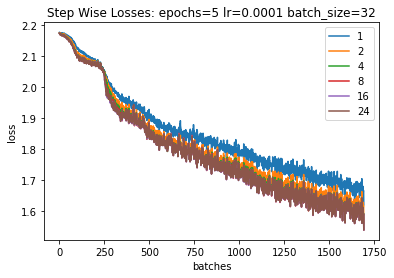

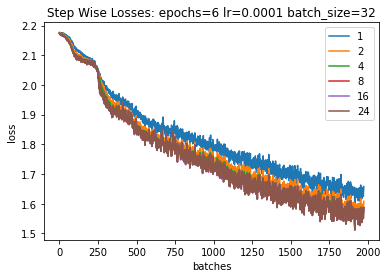

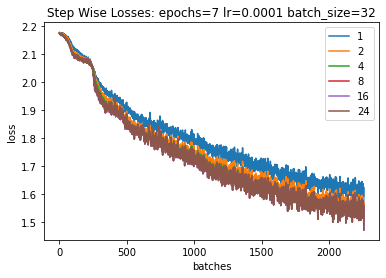

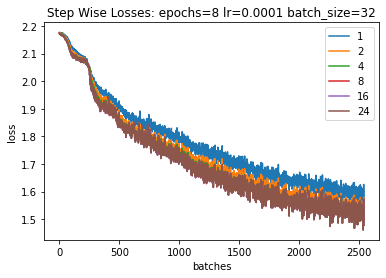

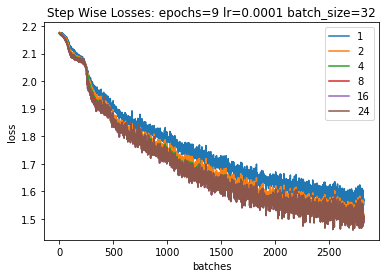

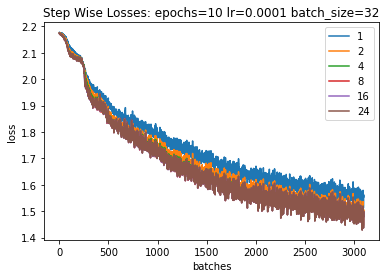

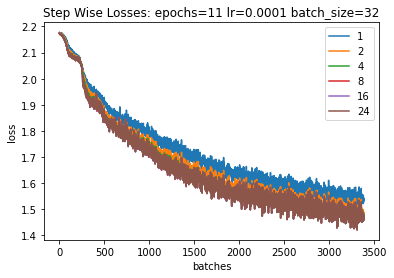

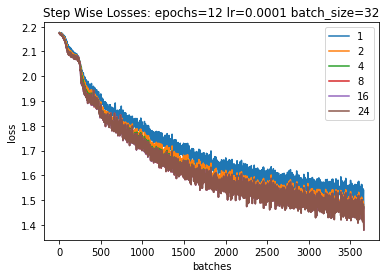

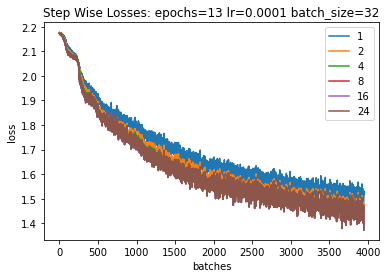

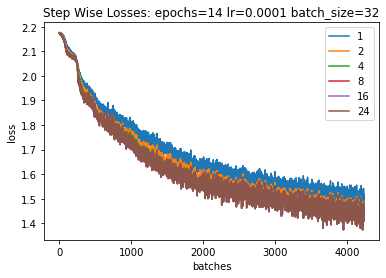

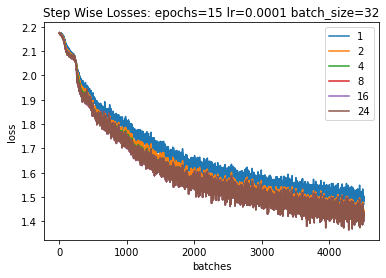

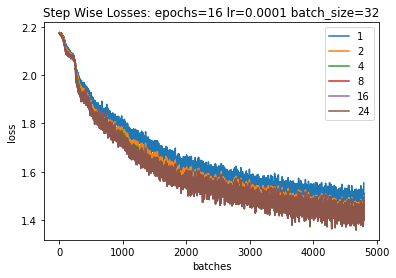

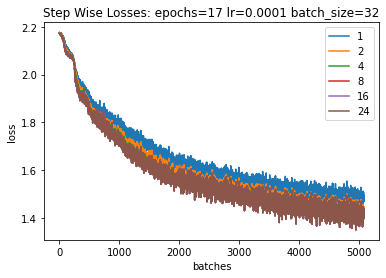

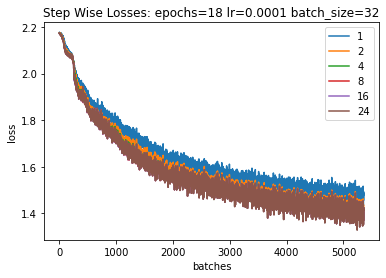

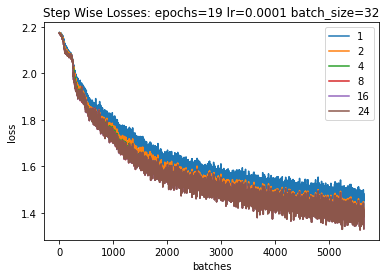

In [ ]:
train.train_rrn(rrn, train_X, train_y,
                        lr=1e-4, batch_size=32, n_epochs=1000, device=device,
                        steps=[0,1,3,7,15,23], show_step=282)

In [6]:
torch.save(rrn.state_dict(), 'data/pt-cache/rrn.pt')

In [11]:
test_x = query_y[-6400:]
test_X = F.one_hot(test_x.long(), num_classes=9).view(-1,576)
test_y = target_y[-6400:]

In [12]:
rrn.load_state_dict(torch.load('data/pt-cache/rrn_24.pt'))
rrn = rrn.to(device)

In [13]:
test_pred = rrn.predict(test_X.to(device)).cpu()
print(classification_report(test_y.view(-1), test_pred.view(-1)))

              precision    recall  f1-score   support

           1       0.94      0.91      0.92       800
           2       0.96      0.98      0.97       800
           3       0.95      0.98      0.96       800
           4       0.97      0.98      0.98       800
           5       0.98      0.88      0.92       800
           6       0.97      0.98      0.98       800
           7       0.96      0.99      0.97       800
           8       0.97      0.99      0.98       800

    accuracy                           0.96      6400
   macro avg       0.96      0.96      0.96      6400
weighted avg       0.96      0.96      0.96      6400



In [27]:
test_x = test_x.view(100,64).long()

In [28]:
test_pred = test_pred.view(100,64)

In [29]:
test_x

tensor([[8, 0, 4,  ..., 8, 2, 7],
        [1, 0, 0,  ..., 0, 0, 3],
        [7, 2, 3,  ..., 0, 3, 0],
        ...,
        [0, 2, 7,  ..., 5, 0, 1],
        [0, 0, 6,  ..., 2, 0, 0],
        [5, 6, 7,  ..., 0, 0, 0]])

In [30]:
test_pred

tensor([[8, 5, 4,  ..., 8, 2, 7],
        [1, 5, 2,  ..., 2, 4, 3],
        [7, 2, 3,  ..., 8, 3, 6],
        ...,
        [5, 2, 7,  ..., 5, 4, 1],
        [4, 7, 6,  ..., 2, 8, 7],
        [2, 6, 7,  ..., 2, 7, 6]])

In [31]:
torch.sum((test_pred == test_x) | (test_x == 0), dim=-1)

tensor([64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
        64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
        64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
        64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
        64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
        64, 64, 64, 64, 64, 64, 64, 64, 64, 63])

In [15]:
ctr = 0
for i in range(100):
    ctr += utils.constraint_violation(test_pred.view(100,64)[i])
print(ctr)

65


In [8]:
test_x = train_x[-100:]
test_X = F.one_hot(test_x, num_classes=9).view(-1,576)
test_y = train_y[-100:]

In [9]:
rrn.load_state_dict(torch.load('data/pt-cache/rrn_24.pt'))
rrn = rrn.to(device)

In [10]:
test_pred = rrn.predict(test_X.to(device)).cpu()
print(classification_report(test_y.view(-1), test_pred.view(-1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.81      0.79      0.80       786
           2       0.80      0.81      0.81       833
           3       0.80      0.85      0.83       758
           4       0.81      0.84      0.82       707
           5       0.79      0.74      0.76       752
           6       0.79      0.80      0.80       824
           7       0.77      0.80      0.79       815
           8       0.82      0.82      0.82       842

    accuracy                           0.80      6400
   macro avg       0.71      0.72      0.71      6400
weighted avg       0.79      0.80      0.79      6400



/home/apps/anaconda3_2018/4.6.9/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
torch.cuda.empty_cache()